## Micro-Credit Defaulter Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score

from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import joblib
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

--------------------------------------------------------------------------

**Loading the dataset**

In [2]:
df=pd.read_csv('Data file.csv')

In [3]:
pd.pandas.set_option('display.max_columns',None)

Checking the first 5 and last 5 rows of the dataset

In [4]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [5]:
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,25-07-2016
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,07-07-2016


---------------------------------------------------------------------------

In [6]:
df.shape

(209593, 37)

The dataset have 209593 rows and 37 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Information of the dataset

In [8]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

Checking the datatype of the data

### Checking Null values

In [9]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

No null value is present in the dataset

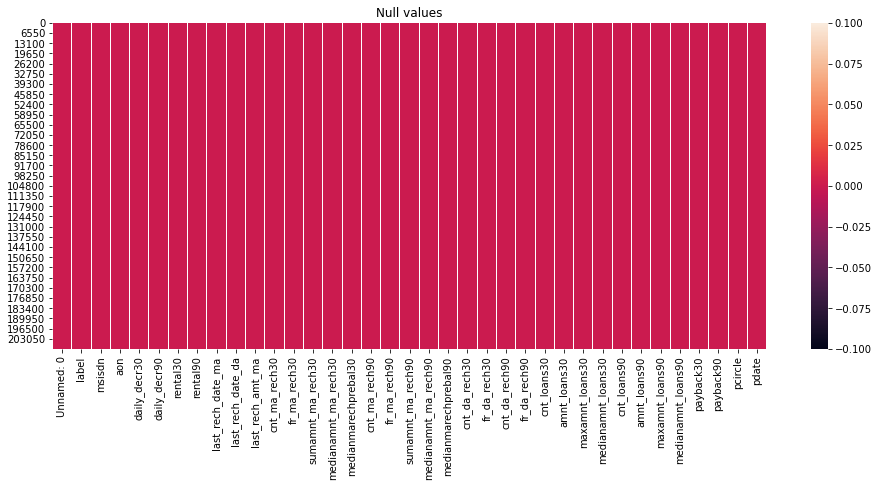

In [10]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

There is no null Value presnt

In [11]:
df['label'].unique()

array([0, 1], dtype=int64)

Checking the unqiuness of the target column in the dataset

In [12]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

Checking the uniqueness in telecom circle

In [13]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

Counting the values, seems like all the rows have same telecom circle

In [14]:
df['msisdn'].unique()

array(['21408I70789', '76462I70374', '17943I70372', ..., '22758I85348',
       '59712I82733', '65061I85339'], dtype=object)

Checking the uniqueness of mobile number of users

In [15]:
df['msisdn'].value_counts()

04581I85330    7
47819I90840    7
43430I70786    6
42825I88688    6
60744I91197    6
              ..
06278I70787    1
97221I70789    1
38320I88689    1
13340I70378    1
24414I88658    1
Name: msisdn, Length: 186243, dtype: int64

Counting the values of Mobile number of user, seems like some numbers are repeated several times

In [16]:
#Summary statistics
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,999606.368100,810096.000000,55000.000000,999479.419300,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


This tells about the mean median of the columns and if there are outliers and skewness present. As there are many columns so to see All columns are not possible , we can check skewness and outliers by other methods later.

### Visualization of the Target

In [17]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In  target column, 1 output rows are 183431 who paidback the load within 5days and 0 output rows are 26162  they are those people who didn't paid back the loan

Text(0, 0.5, 'count')

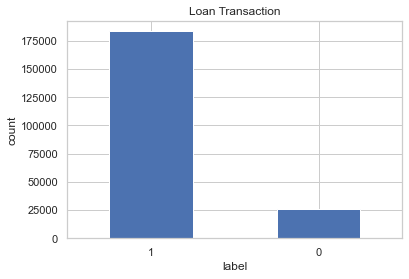

In [18]:
sns.set(style="whitegrid")
count_classes=pd.value_counts(df['label'],sort= True)
count_classes.plot(kind='bar',rot=0)
plt.title('Loan Transaction')
plt.xticks(range(2))
plt.xlabel('label')
plt.ylabel('count')

Unbalanced data is present as label 1 is very high in the dataset,we will handle this later.

In [19]:
Non_defaulter= df[df['label']==1]
defaulter= df[df['label']==0]

In [20]:
print(Non_defaulter.shape,defaulter.shape)

(183431, 37) (26162, 37)


In [21]:
df['daily_decr30'].mean()

5381.402288910841

### EDA

Most of the Daily amount spent from main account  is 5000 indonesian rupiah

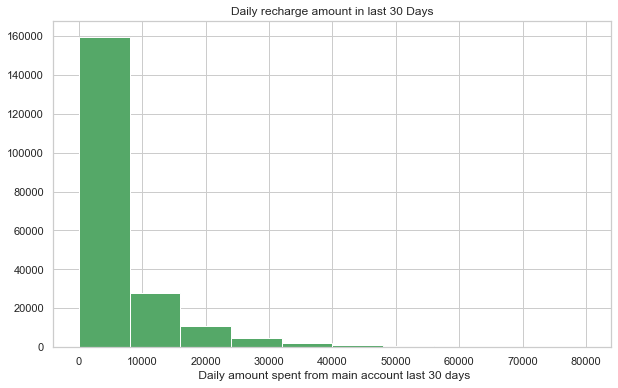

In [22]:

fig = plt.figure(figsize=(10,6))
plt.hist(df['daily_decr30'],color='g',range=[0, 80000])
plt.title('Daily recharge amount in last 30 Days')
plt.xlabel(' Daily amount spent from main account last 30 days')

plt.show()

Daily amount spent from main account last 30 days is between 0 to 6000

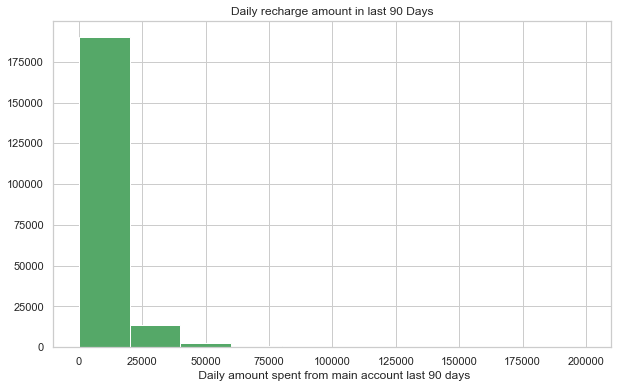

In [23]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['daily_decr90'],color='g',range=[0, 200000])
plt.title('Daily recharge amount in last 90 Days')
plt.xlabel(' Daily amount spent from main account last 90 days')

plt.show()

Daily amount spent from main account last 30 days by most of the people is avg. 6082

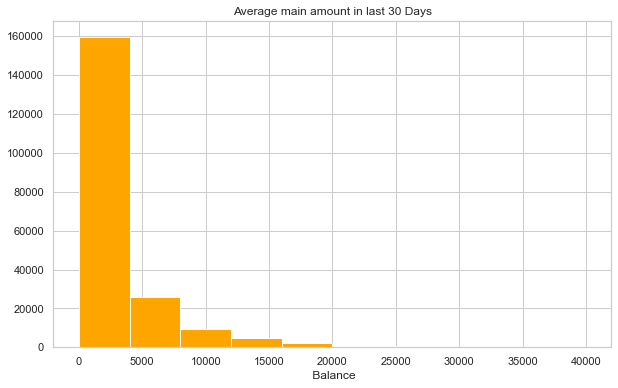

In [24]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['rental30'],color='orange',range=[0, 40000])
plt.title('Average main amount in last 30 Days')
plt.xlabel(' Balance')

plt.show()

This graph represent that maximum people average main account balance is from avg 0 to 2700(indonesian rupiah) in last 30 days

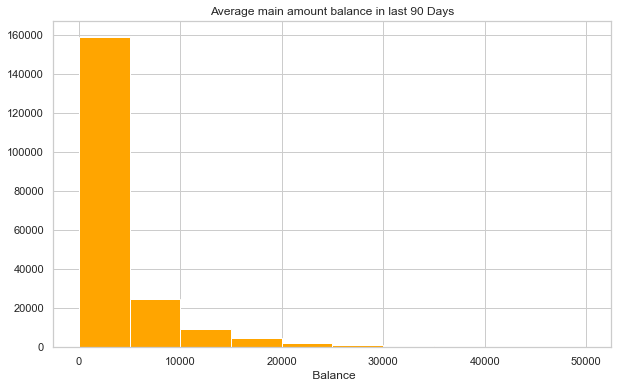

In [25]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['rental90'],color='orange',range=[0, 50000])
plt.title('Average main amount balance in last 90 Days')
plt.xlabel(' Balance')

plt.show()

As above,this graph represent that maximum people average main account balance is from 0 to 3500 in last 90 days

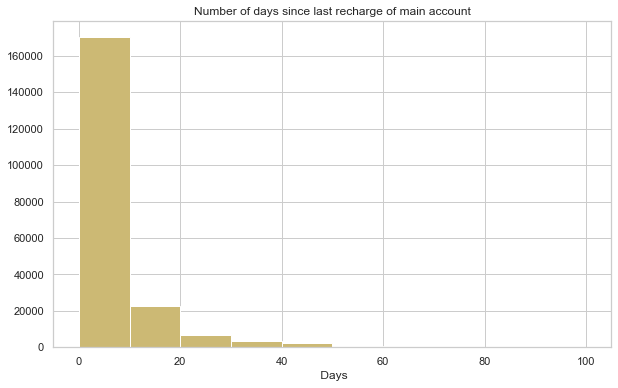

In [26]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['last_rech_date_ma'],color='y',range=[0, 100])
plt.title('Number of days since last recharge of main account')
plt.xlabel(' Days')

plt.show()

This graph represent the Number of days till last recharge of main account and from above graph it's shows that the Most people does not recharge avg  0 to 15 days

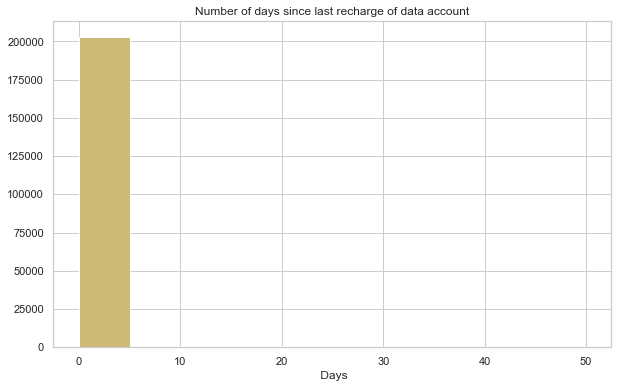

In [27]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['last_rech_date_da'],color='y',range=[0,50])
plt.title('Number of days since last recharge of data account')
plt.xlabel(' Days')

plt.show()

This graph represent the Number of days till last recharge of data account and from above graph it's shows that the Most people does not recharge from 0 to 5 days 

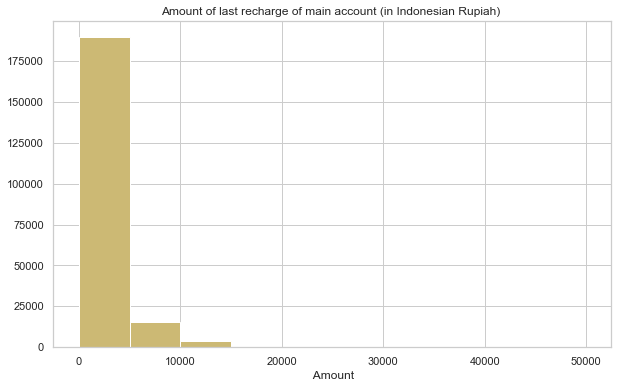

In [28]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['last_rech_amt_ma'],color='y',range=[0,50000])
plt.title('Amount of last recharge of main account (in Indonesian Rupiah) ')
plt.xlabel(' Amount')
plt.show()

This graph represent the Amount of last recharge of main account (in Indonesian Rupiah) and Most of the people done from 0 to 3000 (in Indonesian Rupiah)

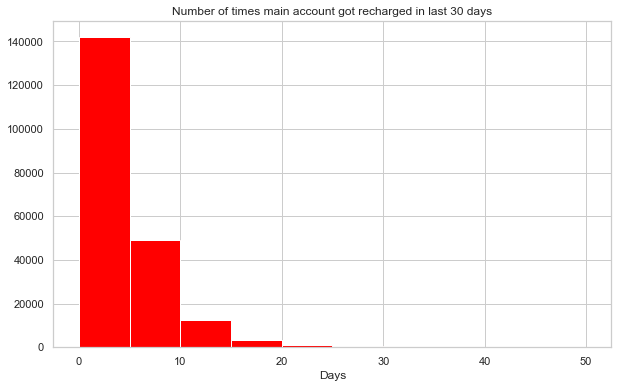

In [29]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['cnt_ma_rech30'],color='red',range=[0,50])
plt.title('Number of times main account got recharged in last 30 days')
plt.xlabel('Days')

plt.show()

This graph shows that the number of times main account got recharged in last 30 days by most of the people are upto 4 days

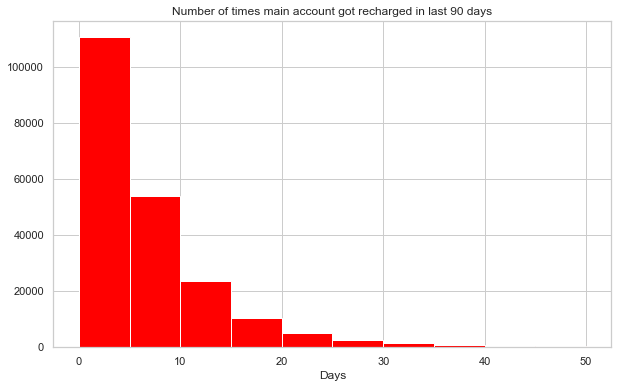

In [30]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['cnt_ma_rech90'],color='red',range=[0,50])
plt.title('Number of times main account got recharged in last 90 days')
plt.xlabel('Days')

plt.show()

This graph shows that the number of times main account got recharged in last 90 days by most of the people are upto 6 days

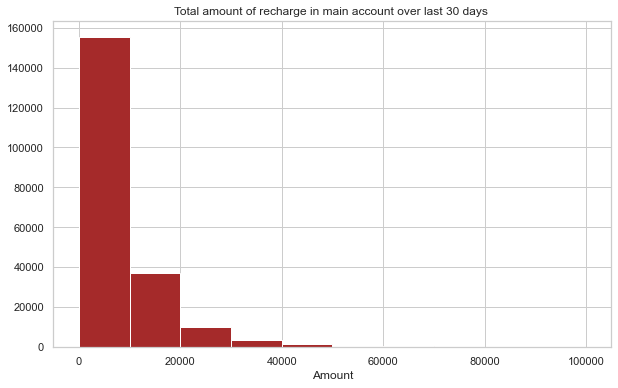

In [31]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['sumamnt_ma_rech30'],color='brown',range=[0,100000])
plt.title('Total amount of recharge in main account over last 30 days ')
plt.xlabel('Amount')

plt.show()

from the above graph of Total amount of recharge in main account over last 30 days (in Indonesian Rupiah) by the most of the people is upto 10000 (in Indonesian Rupiah)

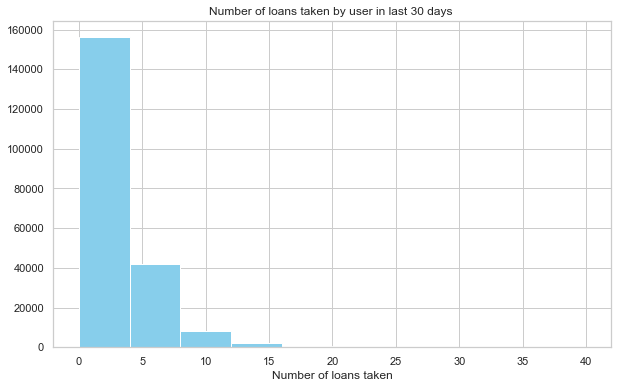

In [32]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['cnt_loans30'],color='skyblue',range=[0,40])
plt.title('Number of loans taken by user in last 30 days ')
plt.xlabel('Number of loans taken')

plt.show()

From the above graph it is shown that the Number of loans taken by user in last 30 days are mostly  3-4 loans by the max. user.

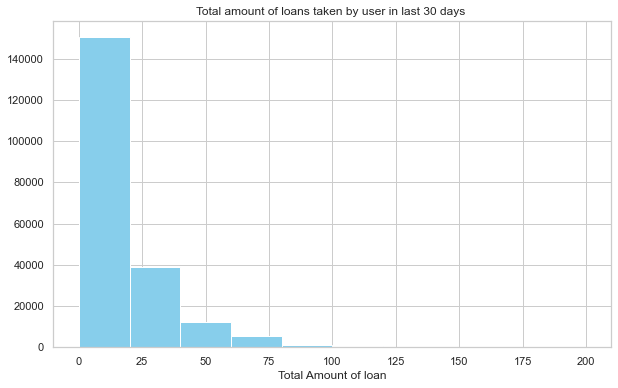

In [33]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['amnt_loans30'],color='skyblue',range=[0,200])
plt.title('Total amount of loans taken by user in last 30 days ')
plt.xlabel('Total Amount of loan')

plt.show()

From the above graph it is shown that the Total amount of loans taken by users in last 30 days are maximum 17-18 loans by maximum users.

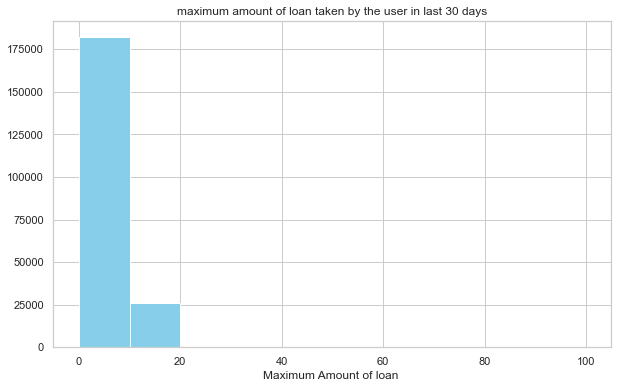

In [34]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['maxamnt_loans30'],color='skyblue',range=[0,100])
plt.title('maximum amount of loan taken by the user in last 30 days')
plt.xlabel('Maximum Amount of loan ')

plt.show()

From the above graph it is shown that the maximum amount of loans taken by users in last 30 days are maximum 10-13 loans by the maximum users.

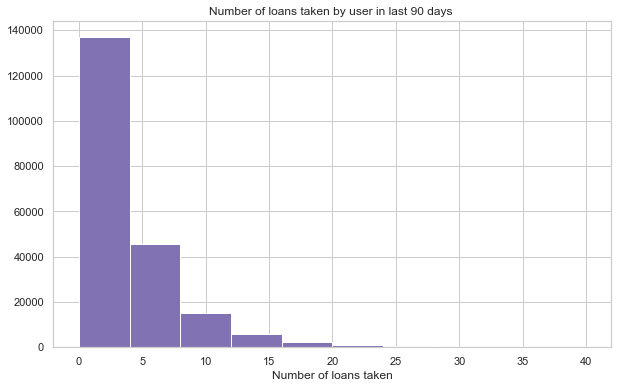

In [35]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['cnt_loans90'],color='m',range=[0,40])
plt.title('Number of loans taken by user in last 90 days ')
plt.xlabel('Number of loans taken')

plt.show()

From the above graph it is shown that the Number of loans taken by user in last 90 days are mostly 1-4 loans by the max. user.

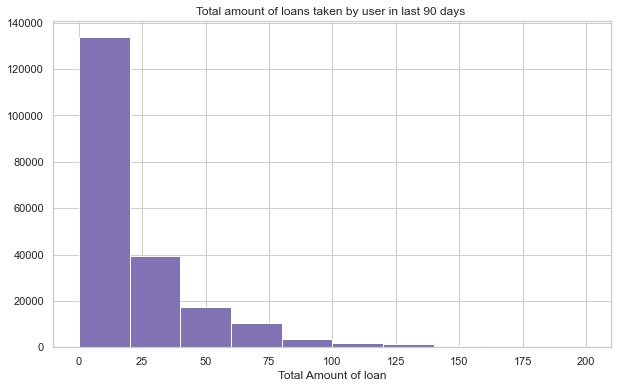

In [36]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['amnt_loans90'],color='m',range=[0,200])
plt.title('Total amount of loans taken by user in last 90 days ')
plt.xlabel('Total Amount of loan')

plt.show()

From the above graph it is shown that the Total amount of loans taken by users in last 90 days are maximum 18-20 loans by maximum users.

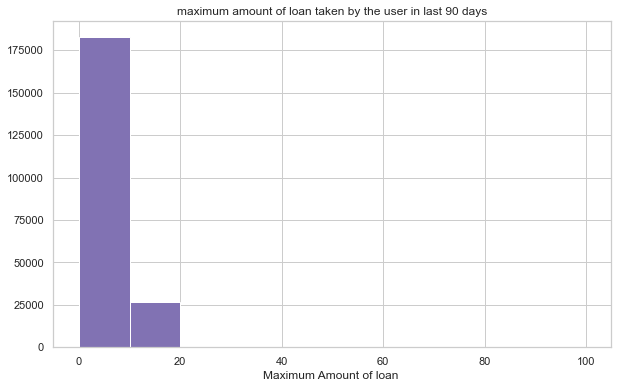

In [37]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['maxamnt_loans90'],color='m',range=[0,100])
plt.title('maximum amount of loan taken by the user in last 90 days')
plt.xlabel('Maximum Amount of loan ')

plt.show()

From the above graph it is shown that the maximum amount of loans taken by users in last 90 days are maximum 10-16 loans by the maximum users.

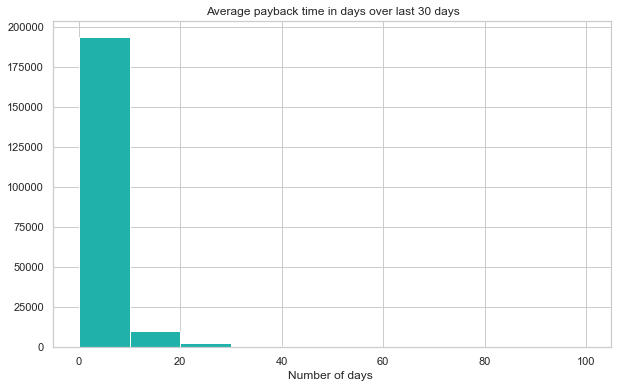

In [38]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['payback30'],color='lightseagreen',range=[0,100])
plt.title('Average payback time in days over last 30 days')
plt.xlabel('Number of days ')

plt.show()

From this graph the Average payback time in days over last 30 days are 10-15days

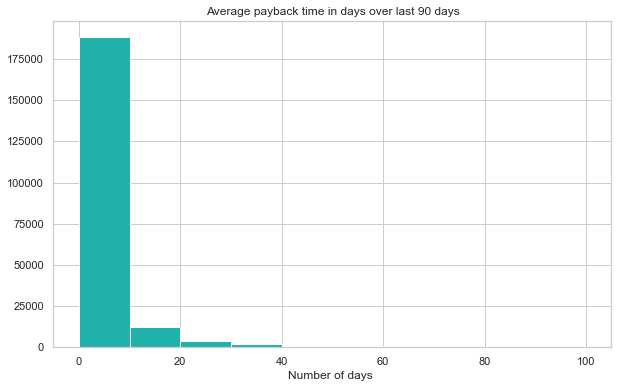

In [39]:
fig = plt.figure(figsize=(10,6))
plt.hist(df['payback90'],color='lightseagreen',range=[0,100])
plt.title('Average payback time in days over last 90 days')
plt.xlabel('Number of days ')

plt.show()

From this graph the Average payback time in days over last 90 days are upto 10 days by most of the users

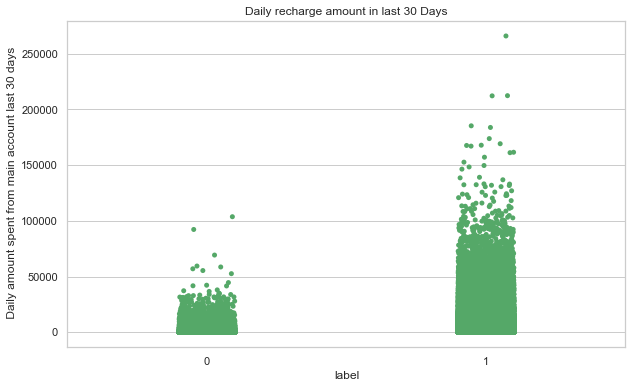

In [40]:
fig = plt.figure(figsize=(10,6))
sns.stripplot(x='label',y='daily_decr30',color='g',orient='v',data=df)
plt.title('Daily recharge amount in last 30 Days')
plt.xlabel('label')
plt.ylabel(' Daily amount spent from main account last 30 days')
plt.show()

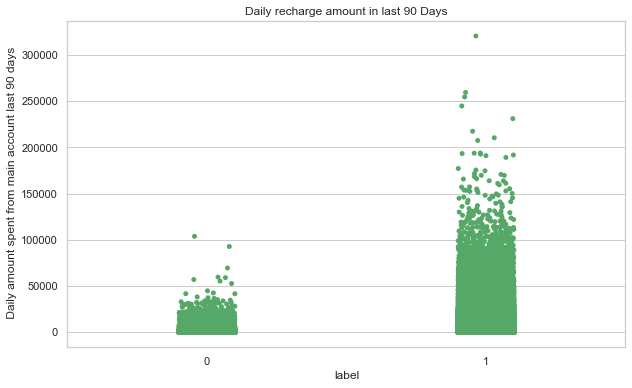

In [41]:
fig = plt.figure(figsize=(10,6))
sns.stripplot(x='label',y='daily_decr90',color='g',orient='v',data=df)
plt.title('Daily recharge amount in last 90 Days')
plt.xlabel('label')
plt.ylabel(' Daily amount spent from main account last 90 days')
plt.show()

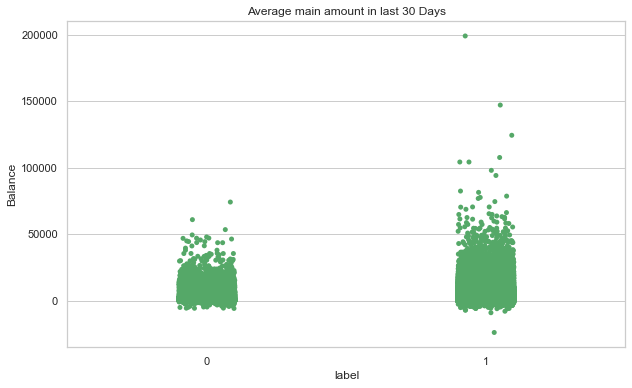

In [42]:
fig = plt.figure(figsize=(10,6))
sns.stripplot(x='label',y='rental30',color='g',orient='v',data=df)
plt.title('Average main amount in last 30 Days')
plt.xlabel('label')
plt.ylabel('Balance')
plt.show()

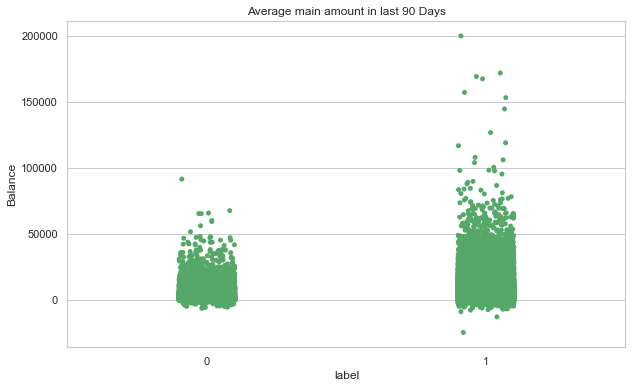

In [43]:
fig = plt.figure(figsize=(10,6))
sns.stripplot(x='label',y='rental90',color='g',orient='v',data=df)
plt.title('Average main amount in last 90 Days')
plt.xlabel('label')
plt.ylabel('Balance')
plt.show()

From the above stripplot graphs we can see that the number of Non-defaulters are very high and also the ouliers are present in the dataset

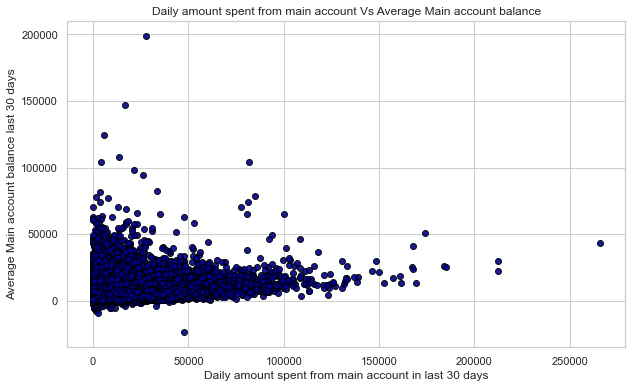

In [44]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df['daily_decr30'],df['rental30'],alpha=0.9,color="DarkBlue",edgecolors='black')
plt.title('Daily amount spent from main account Vs Average Main account balance')
plt.xlabel('Daily amount spent from main account in last 30 days')
plt.ylabel('Average Main account balance last 30 days')
plt.show()

Here we can see that there is a positive distribution of data between the Daily amount spending from main account in last 30 days and Average main account balance last 30 days, also we can see some outliers here

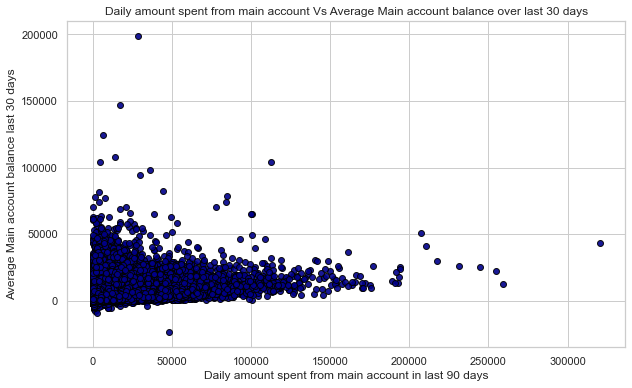

In [45]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df['daily_decr90'],df['rental30'],alpha=0.9,color="DarkBlue",edgecolors='black')
#sns.lmplot('daily_decr90', 'rental30', data=df, hue='label', fit_reg=False)

plt.title('Daily amount spent from main account Vs Average Main account balance over last 30 days')
plt.xlabel('Daily amount spent from main account in last 90 days')
plt.ylabel('Average Main account balance last 30 days')
plt.show()

Here we can see that the distribution of the data between the Daily amount spent from main account in last 90 days and Average Main account balance last 30 days and it clearly shows that there are some outliers present 

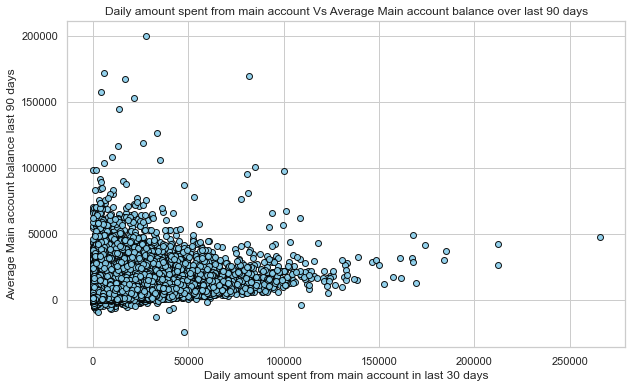

In [46]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df['daily_decr30'],df['rental90'],alpha=0.9,color="skyblue",edgecolors='black')
plt.title('Daily amount spent from main account Vs Average Main account balance over last 90 days')
plt.xlabel('Daily amount spent from main account in last 30 days')
plt.ylabel('Average Main account balance last 90 days')
plt.show()

Here we can see the distribution of data between the Daily amount spending from main account in last 30 days and Average main account balance last 90 days, also we can see some outliers here



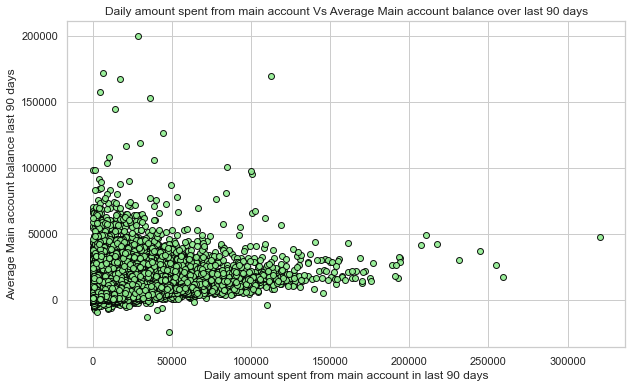

In [47]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df['daily_decr90'],df['rental90'],alpha=0.9,color="lightgreen",edgecolors='black')
plt.title('Daily amount spent from main account Vs Average Main account balance over last 90 days')
plt.xlabel('Daily amount spent from main account in last 90 days')
plt.ylabel('Average Main account balance last 90 days')
plt.show()

Here we can see the distribution of data between the Daily amount spending from main account in last 90 days and Average main account balance last 90 days, also we can see some outliers here

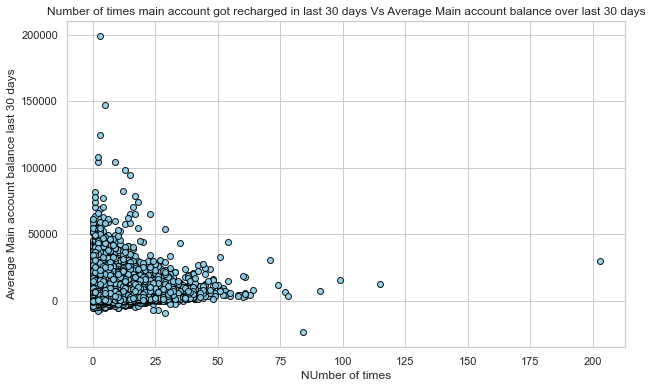

In [48]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df['cnt_ma_rech30'],df['rental30'],alpha=0.9,color="skyblue",edgecolors='black')
plt.title('Number of times main account got recharged in last 30 days Vs Average Main account balance over last 30 days')
plt.xlabel('NUmber of times')
plt.ylabel('Average Main account balance last 30 days')
plt.show()

Here we can see the distribution of data between the number of times main account got recharged in last 30 days and Average main account balance last 30 days, also we can see some outliers here

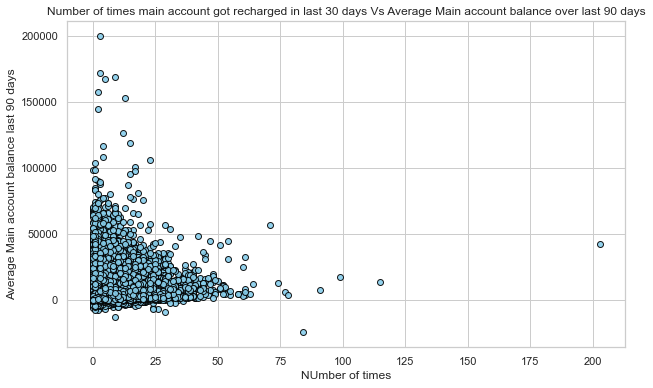

In [49]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df['cnt_ma_rech30'],df['rental90'],alpha=0.9,color="skyblue",edgecolors='black')
plt.title('Number of times main account got recharged in last 30 days Vs Average Main account balance over last 90 days')
plt.xlabel('NUmber of times')
plt.ylabel('Average Main account balance last 90 days')
plt.show()

Here we can see the distribution of data between the number of times main account got recharged in last 30 days and Average main account balance last 90 days, also we can see some outliers here

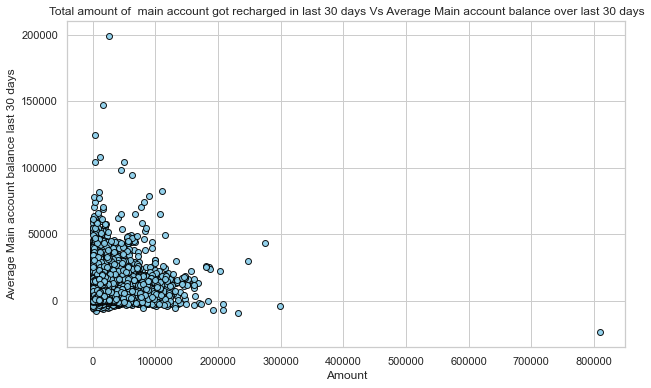

In [50]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df['sumamnt_ma_rech30'],df['rental30'],alpha=0.9,color="skyblue",edgecolors='black')
plt.title('Total amount of  main account got recharged in last 30 days Vs Average Main account balance over last 30 days')
plt.xlabel('Amount')
plt.ylabel('Average Main account balance last 30 days')
plt.show()

Here we can see that there is a  distribution of data between the total amount of recharge in main account over last 30 days and Average main account balance last 30 days, also we can see some outliers here

-------------------------------------------------

##### Examination of correlation Features with each other

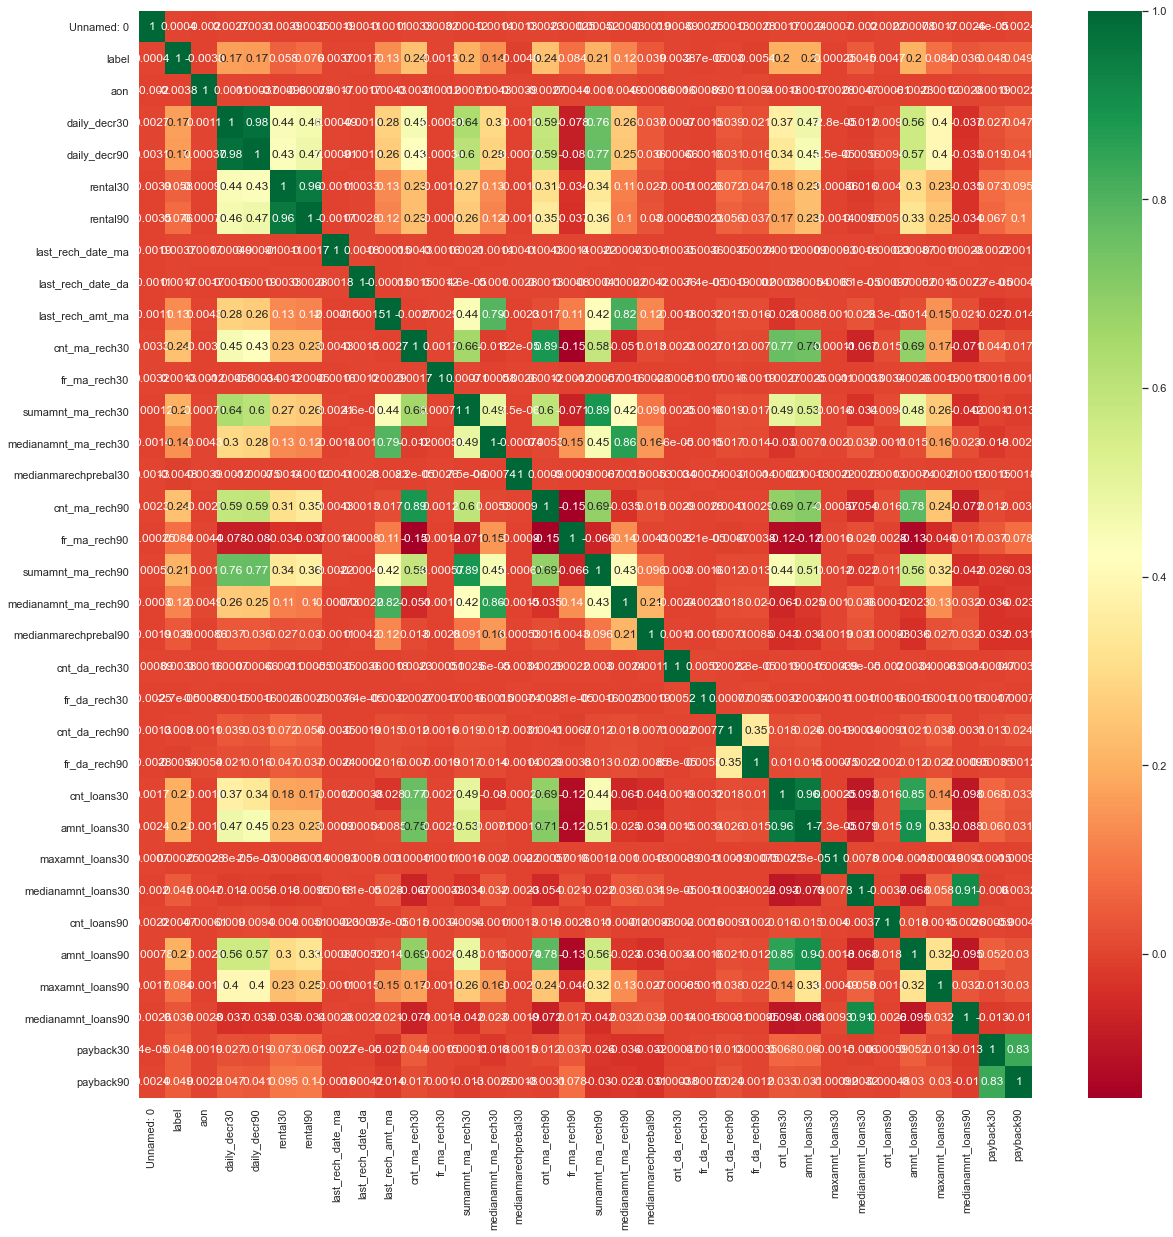

In [54]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

It's very hard to see what is the correlation of different columns with the target variable, we can see the columns relation with target column separately. 

#### Examining correlation of "label" with other features

In [55]:
corr_matrix=df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

Checking th columns which are positively and negatively coonected to the target column

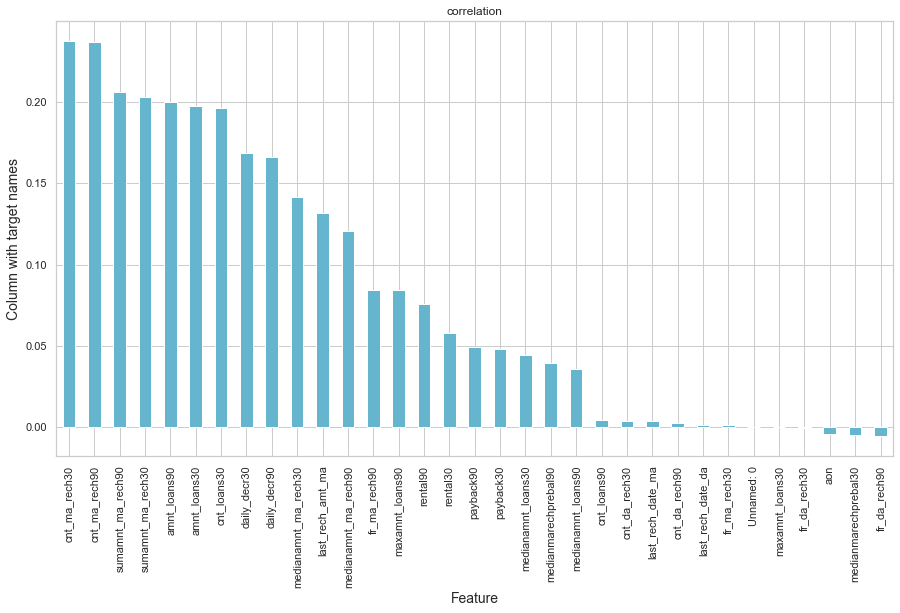

In [56]:

plt.figure(figsize=(15,8))
df.corr()['label'].sort_values(ascending = False).drop(['label']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation')
plt.show()

**Observations**

Number of times main account got recharged in last 30 to 90 days daily and Total amount of recharge in main account over last 90 days (in Indonasian Rupiah) seem to be positively correlated with label . While, Frequency of data account recharged in last 90 days, Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) seem to be negatively correlated with label.

### Dropping unnecessary variables

In [57]:
#Droping the index column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [58]:
a = df["pcircle"].unique()
b = df["pcircle"].nunique()
print(f"There is only {b} unique value that is {a}")

There is only 1 unique value that is ['UPW']


In [59]:
#Dropping "pcircle (telecom circle)" column
df.drop("pcircle",axis=1,inplace=True)

In [60]:
#Dropping "pdate (date)" column
df.drop("pdate",axis=1,inplace=True)

In [61]:
#Dropping "msisdn (mobile number of user)" column
df.drop("msisdn",axis=1,inplace=True)

### Removing the features which are highly correlated

In [62]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [63]:
corr_features = correlation(df, 0.9)
len(set(corr_features))

4

In [64]:
corr_features

{'amnt_loans30', 'daily_decr90', 'medianamnt_loans90', 'rental90'}

In [65]:
df=df.drop(corr_features,axis=1)
df

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,6.0,0.0,2.0,12,6,29.000000,29.000000
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12.0,0.0,1.0,12,12,0.000000,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6.0,0.0,1.0,6,6,0.000000,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,6.0,0.0,2.0,12,6,0.000000,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,6.0,0.0,7.0,42,6,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,6.0,0.0,2.0,12,6,1.000000,1.000000
209589,1,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,6.0,0.0,3.0,18,6,1.000000,1.000000
209590,1,1013.0,11843.111670,5861.83,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,12.0,0.0,6.0,54,12,4.000000,3.833333
209591,1,1732.0,12488.228330,411.83,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,12.0,0.0,3.0,24,12,0.000000,10.500000


In [66]:
df.shape

(209593, 29)

In [67]:
df.head()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,6.0,0.0,2.0,12,6,29.000000,29.000000
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12.0,0.0,1.0,12,12,0.000000,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6.0,0.0,1.0,6,6,0.000000,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,6.0,0.0,2.0,12,6,0.000000,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,6.0,0.0,7.0,42,6,2.333333,2.333333


### Scaling the data

<AxesSubplot:ylabel='Density'>

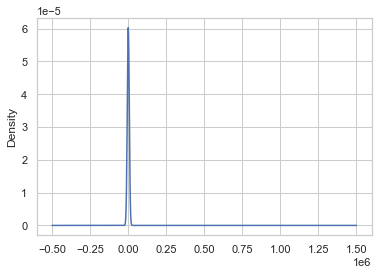

In [68]:
df.aon.plot(kind='density')

In [69]:
#Target Variable (Label)
df_label = df.iloc[:,0]


In [70]:
#Dropping the target variable from dataframe
df.drop("label",axis=1,inplace=True)

In [72]:
headnames=[str(i) for i in df.columns]

In [73]:
from sklearn.preprocessing import Normalizer
scaller=Normalizer()
data = scaller.fit_transform(df)

In [74]:
type(df)

pandas.core.frame.DataFrame

In [75]:
df=pd.DataFrame(df,columns=headnames[0:])

In [76]:
df.shape

(209593, 28)

In [78]:
df.head(5)

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,6.0,0.0,2.0,12,6,29.000000,29.000000
1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12.0,0.0,1.0,12,12,0.000000,0.000000
2,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6.0,0.0,1.0,6,6,0.000000,0.000000
3,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,6.0,0.0,2.0,12,6,0.000000,0.000000
4,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,6.0,0.0,7.0,42,6,2.333333,2.333333


In [80]:
#Concatinating both NUMERIC and label variables
df = pd.concat([df,df_label], axis=1)
df.head(5)

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,label,label
0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,6.0,0.0,2.0,12,6,29.000000,29.000000,0,0
1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12.0,0.0,1.0,12,12,0.000000,0.000000,1,1
2,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6.0,0.0,1.0,6,6,0.000000,0.000000,1,1
3,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,6.0,0.0,2.0,12,6,0.000000,0.000000,1,1
4,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,6.0,0.0,7.0,42,6,2.333333,2.333333,1,1


<AxesSubplot:ylabel='Density'>

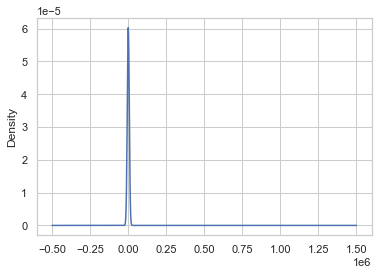

In [81]:
df.aon.plot(kind='density')

Here we can see the distribution of the data

<AxesSubplot:ylabel='Density'>

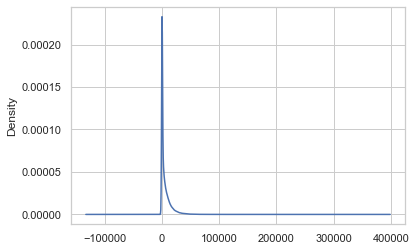

In [82]:
df.daily_decr30.plot(kind='density')

<AxesSubplot:ylabel='Density'>

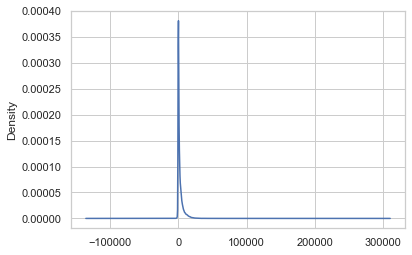

In [84]:
df.rental30.plot(kind='density')

## Feature Selection

In [86]:
#Defining the Target and Predictor Variable
x = df.drop(labels=['label'],axis=1)
y = df.iloc[:,-1]

In [87]:
x

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,6.0,0.0,2.0,12,6,29.000000,29.000000
1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12.0,0.0,1.0,12,12,0.000000,0.000000
2,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6.0,0.0,1.0,6,6,0.000000,0.000000
3,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,6.0,0.0,2.0,12,6,0.000000,0.000000
4,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,6.0,0.0,7.0,42,6,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,6.0,0.0,2.0,12,6,1.000000,1.000000
209589,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,6.0,0.0,3.0,18,6,1.000000,1.000000
209590,1013.0,11843.111670,5861.83,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,12.0,0.0,6.0,54,12,4.000000,3.833333
209591,1732.0,12488.228330,411.83,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,12.0,0.0,3.0,24,12,0.000000,10.500000


In [88]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [90]:
from sklearn.ensemble import RandomForestClassifier  as rf
model=rf()
fit = model.fit(x,y)
score=model.feature_importances_
answer=list(zip(df.columns,score))
answer

[('aon', 0.10334068808375683),
 ('daily_decr30', 0.23853213619181016),
 ('rental30', 0.10856160652035683),
 ('last_rech_date_ma', 0.05256362636936785),
 ('last_rech_date_da', 0.0038315667683948627),
 ('last_rech_amt_ma', 0.023233430126674778),
 ('cnt_ma_rech30', 0.021797471341142707),
 ('fr_ma_rech30', 0.01819293617852241),
 ('sumamnt_ma_rech30', 0.03870665973274633),
 ('medianamnt_ma_rech30', 0.024220839531608567),
 ('medianmarechprebal30', 0.05714628304148489),
 ('cnt_ma_rech90', 0.04227165230547047),
 ('fr_ma_rech90', 0.025755863131390232),
 ('sumamnt_ma_rech90', 0.05857938014866252),
 ('medianamnt_ma_rech90', 0.024953855388601492),
 ('medianmarechprebal90', 0.06340236327646775),
 ('cnt_da_rech30', 0.002327265264570957),
 ('fr_da_rech30', 0.001666383863974087),
 ('cnt_da_rech90', 0.0022387469607121936),
 ('fr_da_rech90', 0.0009300583553072893),
 ('cnt_loans30', 0.009287939026499673),
 ('maxamnt_loans30', 0.005544380187970084),
 ('medianamnt_loans30', 0.0076014842899941645),
 ('cnt_l

In [91]:
from operator import itemgetter
sorted(answer,key=itemgetter(1),reverse=True)

[('daily_decr30', 0.23853213619181016),
 ('rental30', 0.10856160652035683),
 ('aon', 0.10334068808375683),
 ('medianmarechprebal90', 0.06340236327646775),
 ('sumamnt_ma_rech90', 0.05857938014866252),
 ('medianmarechprebal30', 0.05714628304148489),
 ('last_rech_date_ma', 0.05256362636936785),
 ('cnt_ma_rech90', 0.04227165230547047),
 ('sumamnt_ma_rech30', 0.03870665973274633),
 ('fr_ma_rech90', 0.025755863131390232),
 ('medianamnt_ma_rech90', 0.024953855388601492),
 ('medianamnt_ma_rech30', 0.024220839531608567),
 ('last_rech_amt_ma', 0.023233430126674778),
 ('cnt_ma_rech30', 0.021797471341142707),
 ('amnt_loans90', 0.019374224408801825),
 ('payback90', 0.018256518976453365),
 ('fr_ma_rech30', 0.01819293617852241),
 ('payback30', 0.01324381224938612),
 ('cnt_loans90', 0.010196774042721513),
 ('cnt_loans30', 0.009287939026499673),
 ('medianamnt_loans30', 0.0076014842899941645),
 ('maxamnt_loans30', 0.005544380187970084),
 ('maxamnt_loans90', 0.004242054237149987),
 ('last_rech_date_da', 

In [93]:
#Feature ranking with recursive feature elimination.
from sklearn.feature_selection import RFE

rfe=RFE(model,25) #Selecting top 25 important features
fit=rfe.fit(x,y)
results=fit.transform(x)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

25
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False  True False  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 4 1 1 1 1 1 1 1 1]


In [97]:
#Selecting the best ranked features (fit.support_ = True)
j=0
names=[]
for i in fit.support_:
    if i==True:
        names.append(headnames[j])
    j+=1

In [99]:
names

['aon',
 'daily_decr30',
 'rental30',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech90',
 'cnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'payback30',
 'payback90']

In [101]:
x=pd.DataFrame()
for i in names:
    x[i]=df[i]

#### Removing Outliers

In [102]:
from scipy.stats import zscore

z=np.abs(zscore(x))
x[(z<3).all(axis=1)]

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0,2,6.0,0.0,2.0,12,6,29.000000,29.000000
1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0,1,12.0,0.0,1.0,12,12,0.000000,0.000000
2,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0,1,6.0,0.0,1.0,6,6,0.000000,0.000000
3,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0,2,6.0,0.0,2.0,12,6,0.000000,0.000000
4,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0,7,6.0,0.0,7.0,42,6,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0,2,6.0,0.0,2.0,12,6,1.000000,1.000000
209589,1075.0,36.936000,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0,3,6.0,0.0,3.0,18,6,1.000000,1.000000
209590,1013.0,11843.111670,5861.83,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0,4,12.0,0.0,6.0,54,12,4.000000,3.833333
209591,1732.0,12488.228330,411.83,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,1,2,12.0,0.0,3.0,24,12,0.000000,10.500000


##### Handling class imbalance problem by undersampling the minority class

In [114]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_res,y_res=SM.fit_resample(x,y)

In [115]:
y_res.shape

(366862,)

##   Model selection using various classifiers (Logistic Reg, Random Forest, Decision Tree, Naive Bayes, LinearSVC)

### Now, splitting the data for Training & Testing

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=101)

In [117]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(146715, 25)
(62878, 25)
(146715,)
(62878,)


### LOGISTIC REGRESSION

In [119]:

model = LogisticRegression()
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred_y))
# classification report
print(classification_report(y_test, pred_y))
#Confusion_matrx
print(confusion_matrix(y_test, pred_y))

Accuracy Score: 0.8745666210757339
              precision    recall  f1-score   support

           0       0.50      0.18      0.26      7908
           1       0.89      0.97      0.93     54970

    accuracy                           0.87     62878
   macro avg       0.70      0.58      0.60     62878
weighted avg       0.84      0.87      0.85     62878

[[ 1414  6494]
 [ 1393 53577]]


In [120]:
#Now lets try to do some evaluation for Logistic Regression using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
print("The mean of cross_validation score :",model_eval.mean())

The mean of cross_validation score : 0.8782196776062434


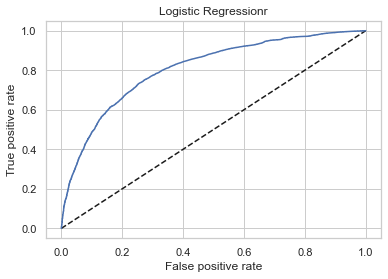

0.576732588493342

In [121]:
#Logistic Regression Curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regressionr')
plt.show()
auc_score=roc_auc_score(y_test,model.predict(x_test))
auc_score

### RANDOM FOREST CLASSIFIER

In [122]:
# creating the model
model = RandomForestClassifier(n_estimators = 100)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the accuracy
print("Accuracy Score:",accuracy_score(y_test,y_pred))
# classification report
print(classification_report(y_test, y_pred))
#Confusion_matrx
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9110340659690194
              precision    recall  f1-score   support

           0       0.76      0.43      0.55      7908
           1       0.92      0.98      0.95     54970

    accuracy                           0.91     62878
   macro avg       0.84      0.71      0.75     62878
weighted avg       0.90      0.91      0.90     62878

[[ 3405  4503]
 [ 1091 53879]]


In [123]:
#Now lets try to do some evaluation for RandomForestClassifier using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
print("The mean of cross_validation score :",model_eval.mean())

The mean of cross_validation score : 0.911501891422145


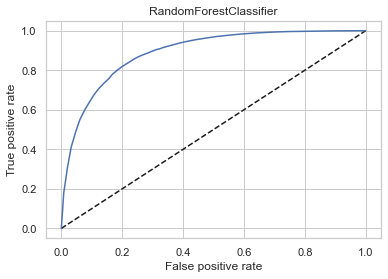

0.7053647209417304

In [124]:
#RandomForest Curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,model.predict(x_test))
auc_score

### DecisionTreeClassifier

In [136]:
# creating the model
model = DecisionTreeClassifier(criterion='entropy',random_state=7)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the accuracy
print("Accuracy Score:",accuracy_score(y_test,y_pred))
# classification report
print(classification_report(y_test, y_pred))
#Confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.869143420592258
              precision    recall  f1-score   support

           0       0.48      0.49      0.48      7908
           1       0.93      0.92      0.93     54970

    accuracy                           0.87     62878
   macro avg       0.70      0.71      0.70     62878
weighted avg       0.87      0.87      0.87     62878

[[ 3851  4057]
 [ 4171 50799]]


In [137]:
model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
print("The mean of cross_validation score :",model_eval.mean())

The mean of cross_validation score : 0.8657465153528949


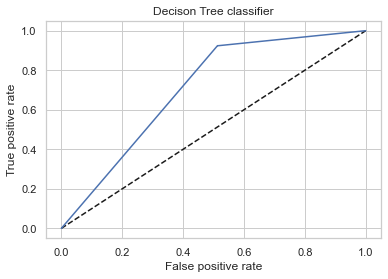

0.7055487317356808

In [138]:
#Decision Tree Curve

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decison Tree classifier')
plt.show()
auc_score=roc_auc_score(y_test,model.predict(x_test))
auc_score

### GAUSSIAN NAIVEBAYES

In [128]:
# creating the model
model = GaussianNB()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the accuracy
print("Accuracy Score:",accuracy_score(y_test,y_pred))
# classification report
print(classification_report(y_test, pred_y))
#Confusion_matrx
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.5661916727631287
              precision    recall  f1-score   support

           0       0.50      0.18      0.26      7908
           1       0.89      0.97      0.93     54970

    accuracy                           0.87     62878
   macro avg       0.70      0.58      0.60     62878
weighted avg       0.84      0.87      0.85     62878

[[ 6949   959]
 [26318 28652]]


In [129]:
model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
print("The mean of cross_validation score :",model_eval.mean())

The mean of cross_validation score : 0.5663292778516171


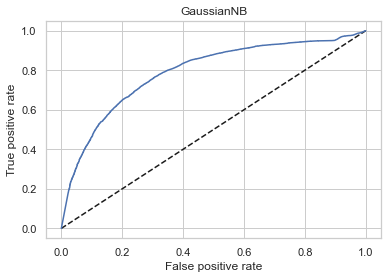

0.6999800806417701

In [130]:
#GaussianNB CURVE

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GaussianNB')
plt.show()
auc_score=roc_auc_score(y_test,model.predict(x_test))
auc_score

### SUPPORT VECTOR MACHINE

In [147]:
from sklearn.svm import SVC

# creating the model
clf =  LinearSVC()


# feeding the training set into the model
clf.fit(x_train, y_train)

# predicting the results for the test set
y_pred = clf.predict(x_test)

# calculating the accuracy
print("Accuracy Score:",accuracy_score(y_test,y_pred))
# classification report
print(classification_report(y_test, pred_y))
#Confusion_matrx
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.6157002449187315
              precision    recall  f1-score   support

           0       0.50      0.18      0.26      7908
           1       0.89      0.97      0.93     54970

    accuracy                           0.87     62878
   macro avg       0.70      0.58      0.60     62878
weighted avg       0.84      0.87      0.85     62878

[[ 2597  5311]
 [18853 36117]]


In [148]:
model_eval = cross_val_score(estimator = clf, X = x_train, y = y_train, cv = 5)
print("The mean of cross_validation score :",model_eval.mean())

The mean of cross_validation score : 0.5159390655352214


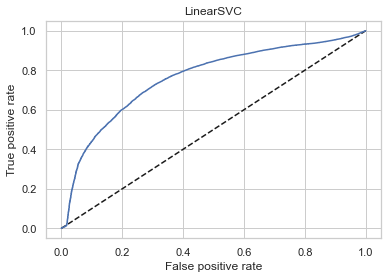

0.6999800806417701

In [133]:
#SVC CURVE
predict_proba_dist= clf.decision_function(x_test)
fpr,tpr,thresholds=roc_curve(y_test,predict_proba_dist)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LinearSVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LinearSVC')
plt.show()
auc_score=roc_auc_score(y_test,model.predict(x_test))
auc_score

## Observation:
we can say that,the aucroc score of Decision tree classifier CURVE is high among the all,  so we can use this model for the prediction.

### Hyperparameter Tuning

In [135]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 7),
              "min_samples_leaf": randint(1, 7),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
dtc = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
dtc_cv = RandomizedSearchCV(dtc, param_dist, cv=5)

# Fit it to the data
dtc_cv.fit(x_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dtc_cv.best_params_))
print("Best score is {}".format(dtc_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 6}
Best score is 0.8858058139931158


###  Final modelling and evaluating using Best Parameteres.

In [145]:
dtc = DecisionTreeClassifier(criterion= 'gini', max_depth= None, max_features= 6, min_samples_leaf= 6,random_state=42)
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
# calculating the accuracy
print("Accuracy Score:",accuracy_score(y_test,y_pred))
# classification report
print("classification_report :",classification_report(y_test, y_pred))
#Confusion_matrx
print("confusion_matrix: ",confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8854925411113586
classification_report :               precision    recall  f1-score   support

           0       0.55      0.48      0.52      7908
           1       0.93      0.94      0.94     54970

    accuracy                           0.89     62878
   macro avg       0.74      0.71      0.73     62878
weighted avg       0.88      0.89      0.88     62878

confusion_matrix:  [[ 3824  4084]
 [ 3116 51854]]


(2.0, -0.1)

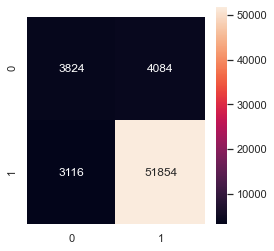

In [146]:
cm_DTC = confusion_matrix(y_test, y_pred)
_,ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_DTC,annot=True,fmt="d")
ax.set_ylim(2,-0.1)

In [149]:
model_eval = cross_val_score(estimator = dtc, X = x_train, y = y_train, cv = 5)
print("The mean of cross_validation score :",model_eval.mean())

The mean of cross_validation score : 0.8839177998159699


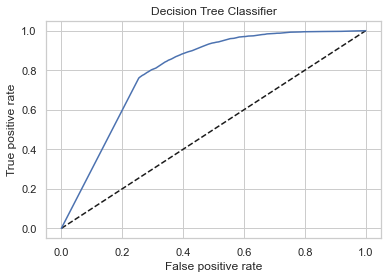

0.7055487317356808

In [150]:
#DTC CURVE
y_pred_prob = dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,model.predict(x_test))
auc_score

The final model has an Accuracy of 0.89 and AUC_ROC score of 0.70.

### Saving the model

In [151]:
joblib.dump(dtc,'dtcmodel.obj')

['dtcmodel.obj']

###  Conclusion:


In [154]:
loaded_model= joblib.load('dtcmodel.obj')
result=loaded_model.score(x_test,y_test)
print(result)

0.8854925411113586
